In [3]:
import pandas as pd
import os

In [4]:
os.getcwd()

'/home/george_sturrock/UdemyPythonforDS'

In [5]:
movies = pd.read_csv('Movie-Ratings.csv')

In [6]:
len(movies)

559

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                         559 non-null object
Genre                        559 non-null object
Rotten Tomatoes Ratings %    559 non-null int64
Audience Ratings %           559 non-null int64
Budget (million $)           559 non-null int64
Year of release              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [8]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [9]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [10]:
movies.columns = ['Film', 'Genre', 'RottenTomatoesRatings', 'AudienceRating',
       'BudgetMillions', 'Year']

In [11]:
movies.columns

Index(['Film', 'Genre', 'RottenTomatoesRatings', 'AudienceRating',
       'BudgetMillions', 'Year'],
      dtype='object')

In [12]:
movies.head()

,Film,Genre,RottenTomatoesRatings,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [13]:
movies.describe()

,RottenTomatoesRatings,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [14]:
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                     559 non-null category
Genre                    559 non-null category
RottenTomatoesRatings    559 non-null int64
AudienceRating           559 non-null int64
BudgetMillions           559 non-null int64
Year                     559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [15]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

------

In [16]:
## Working with Joint Plots

In [112]:
from matplotlib import pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

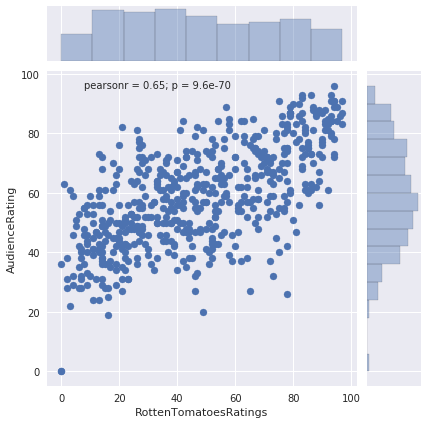

In [34]:
#Scatter plot - default kind
j = sns.jointplot(data=movies, x = 'RottenTomatoesRatings', y= 'AudienceRating')

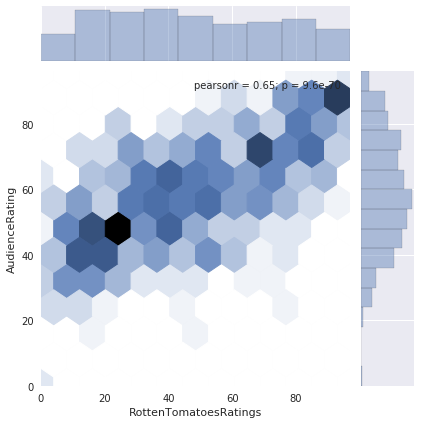

In [33]:
#Hexagon graph for showing clusters
j = sns.jointplot(data=movies, x = 'RottenTomatoesRatings', y= 'AudienceRating', kind='hex')

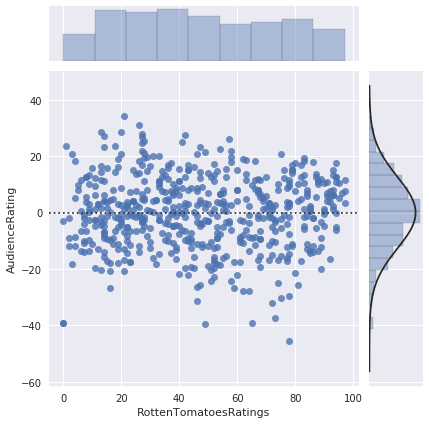

In [35]:
#Residuals
j = sns.jointplot(data=movies, x = 'RottenTomatoesRatings', y= 'AudienceRating', kind='residual')

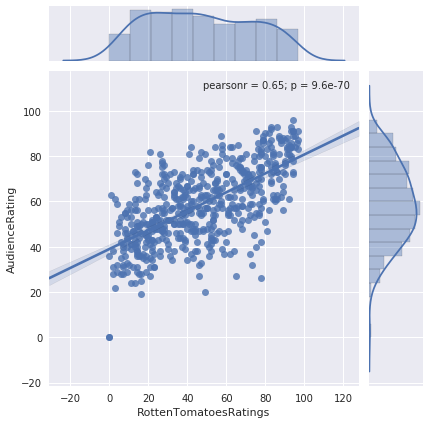

In [36]:
#Regression
j = sns.jointplot(data=movies, x = 'RottenTomatoesRatings', y= 'AudienceRating', kind='reg')

------

In [37]:
## Histograms

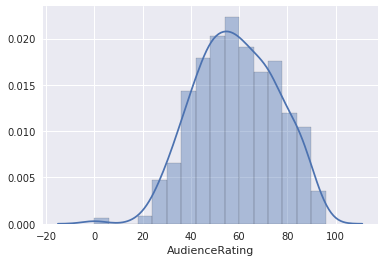

In [38]:
m1 = sns.distplot(movies.AudienceRating)

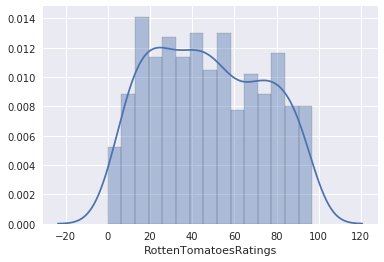

In [44]:
m1 = sns.distplot(movies.RottenTomatoesRatings, bins=15)

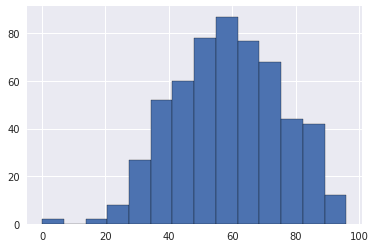

In [43]:
n1 = plt.hist(movies.AudienceRating, bins=14)

------

In [45]:
## Stacked Histograms in Python

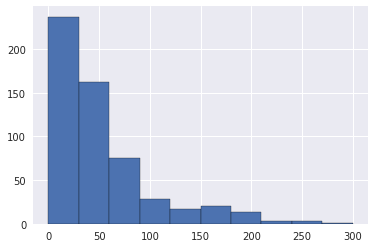

In [48]:
h1 = plt.hist(movies.BudgetMillions)
plt.show()

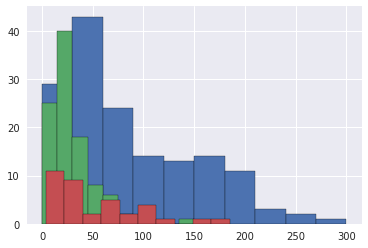

In [55]:
#Overlay Histograms of Movie Budgets by Genre
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions)
plt.show()

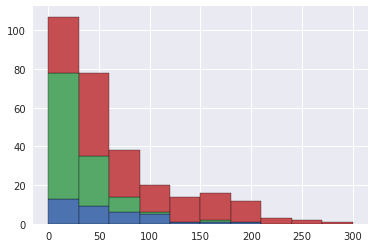

In [57]:
#Staked Histograms
plt.hist([movies[movies.Genre == 'Thriller'].BudgetMillions, movies[movies.Genre == 'Drama'].BudgetMillions, \
          movies[movies.Genre == 'Action'].BudgetMillions], stacked=True)
plt.show()

In [58]:
movies.Genre.cat.categories


Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

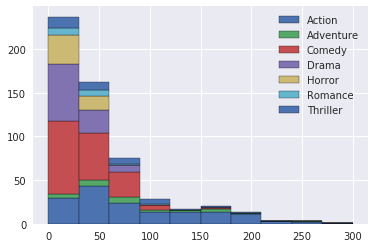

In [67]:
#Automate stacked histogram creation for genres
list1 = list()
labels = list()

for g in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == g].BudgetMillions)
    labels.append(g)

h=plt.hist(list1, stacked=True, rwidth=1, label=labels)
plt.legend()
plt.show()

------

In [68]:
#KDE Plot - Kernel Density Estimate

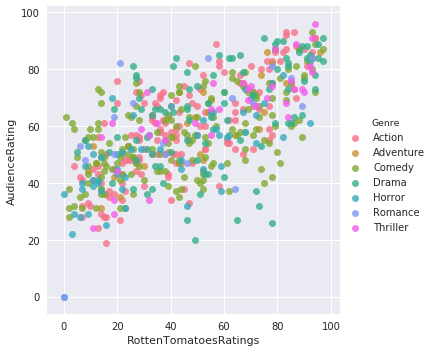

In [70]:
vis1 = sns.lmplot(data=movies, x='RottenTomatoesRatings', y='AudienceRating', hue='Genre', fit_reg=False)

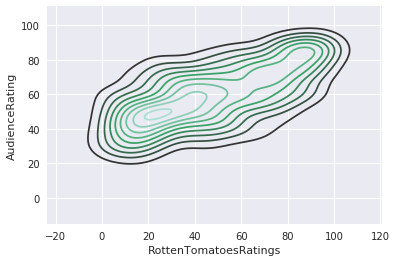

In [72]:
k1 = sns.kdeplot(movies.RottenTomatoesRatings, movies.AudienceRating)

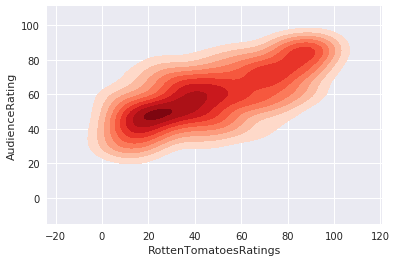

In [76]:
k1 = sns.kdeplot(movies.RottenTomatoesRatings, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds')

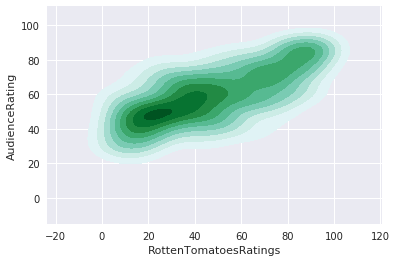

In [79]:
k1b = sns.kdeplot(movies.RottenTomatoesRatings, movies.AudienceRating, shade=True, shade_lowest=False)

------

In [80]:
## Working with Subplots()

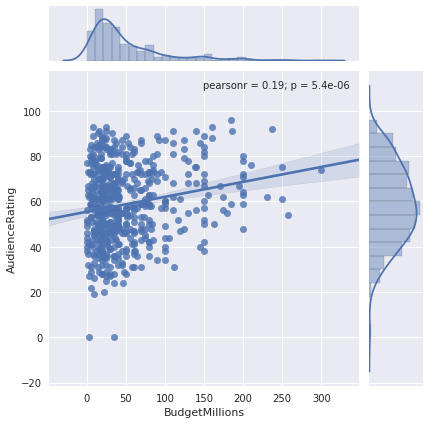

In [83]:
j2 = sns.jointplot(data=movies, x='BudgetMillions', y= 'AudienceRating', kind='reg')

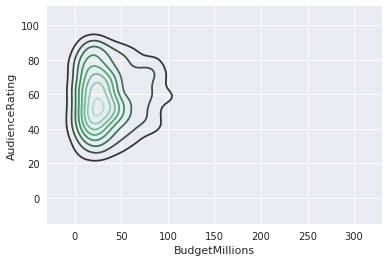

In [82]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

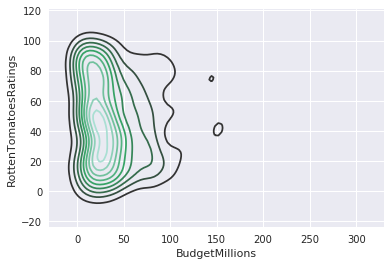

In [88]:
k3 = sns.kdeplot(movies.BudgetMillions, movies.RottenTomatoesRatings)

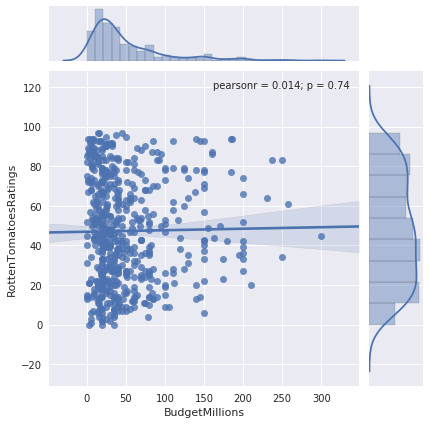

In [85]:
j3 = sns.jointplot(data=movies, x='BudgetMillions', y= 'RottenTomatoesRatings', kind='reg')

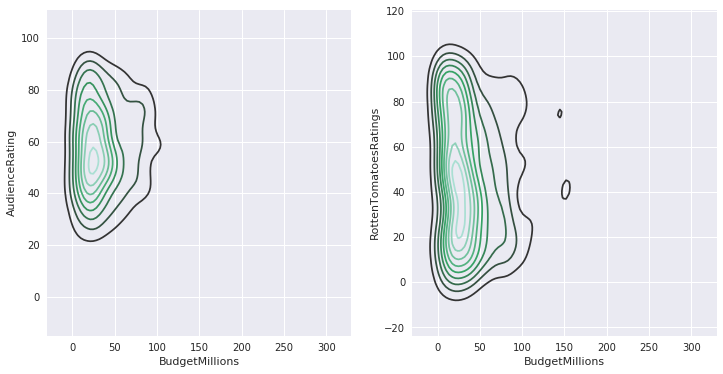

In [92]:
f, axes = plt.subplots(1,2, figsize=(12,6))
k2 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k3 = sns.kdeplot(movies.BudgetMillions, movies.RottenTomatoesRatings, ax=axes[1])

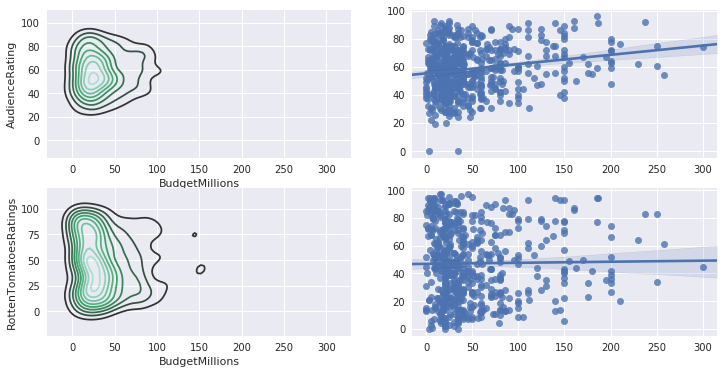

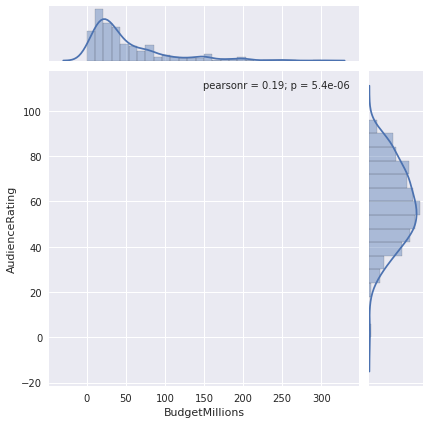

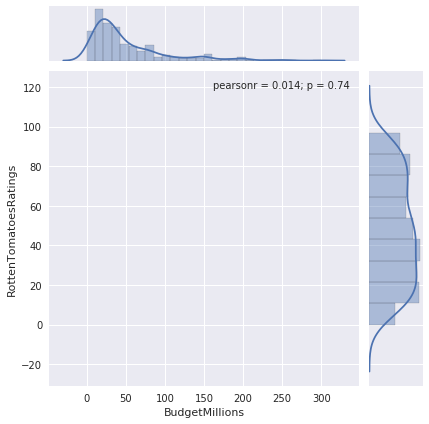

In [98]:
f, axes = plt.subplots(2,2, figsize=(12,6))
k2 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k3 = sns.kdeplot(movies.BudgetMillions, movies.RottenTomatoesRatings, ax=axes[1,0])
j2 = sns.jointplot(data=movies, x='BudgetMillions', y= 'AudienceRating', kind='reg', ax=axes[0,1])
j3 = sns.jointplot(data=movies, x='BudgetMillions', y= 'RottenTomatoesRatings', kind='reg', ax=axes[1,1])

------

In [99]:
#Violin Plots and Box Plots

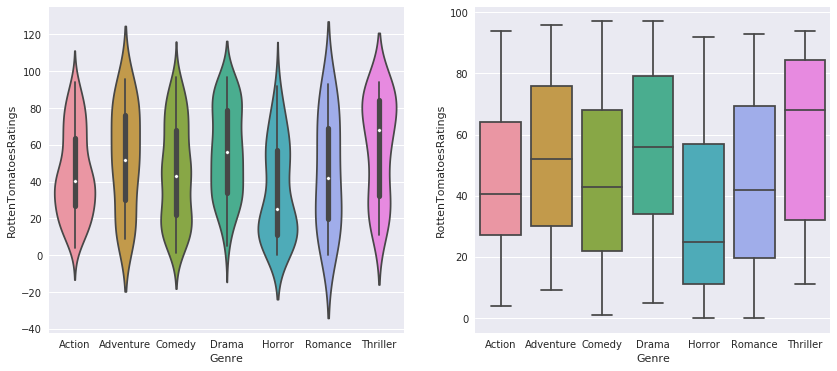

In [104]:
f, axes = plt.subplots(1,2, figsize=(14,6))
z = sns.violinplot(data=movies, x='Genre', y='RottenTomatoesRatings', ax=axes[0])
b = sns.boxplot(data=movies, x='Genre', y='RottenTomatoesRatings', ax=axes[1])

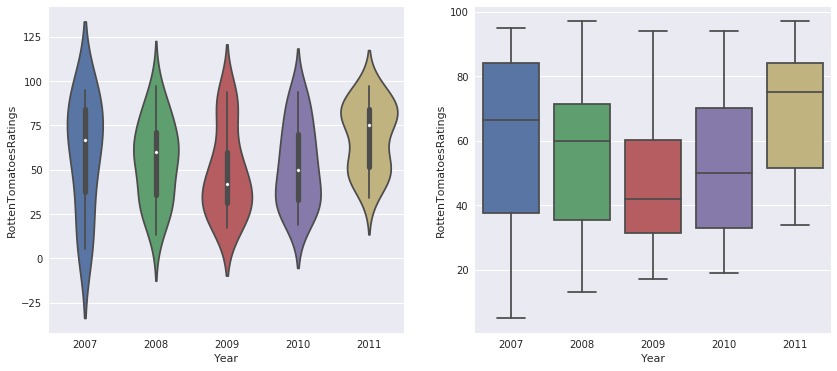

In [105]:
#Box and Violin Plots with focus on Dramas
f, axes = plt.subplots(1,2, figsize=(14,6))
z = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='RottenTomatoesRatings', ax=axes[0])
b = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year', y='RottenTomatoesRatings', ax=axes[1])

------

In [106]:
## Creating a Facet Grid

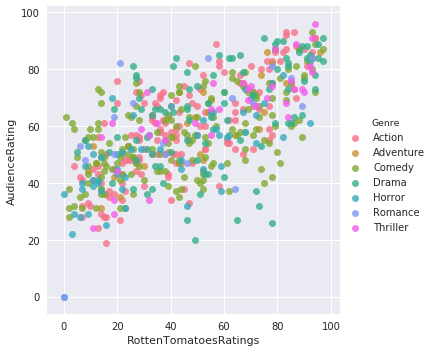

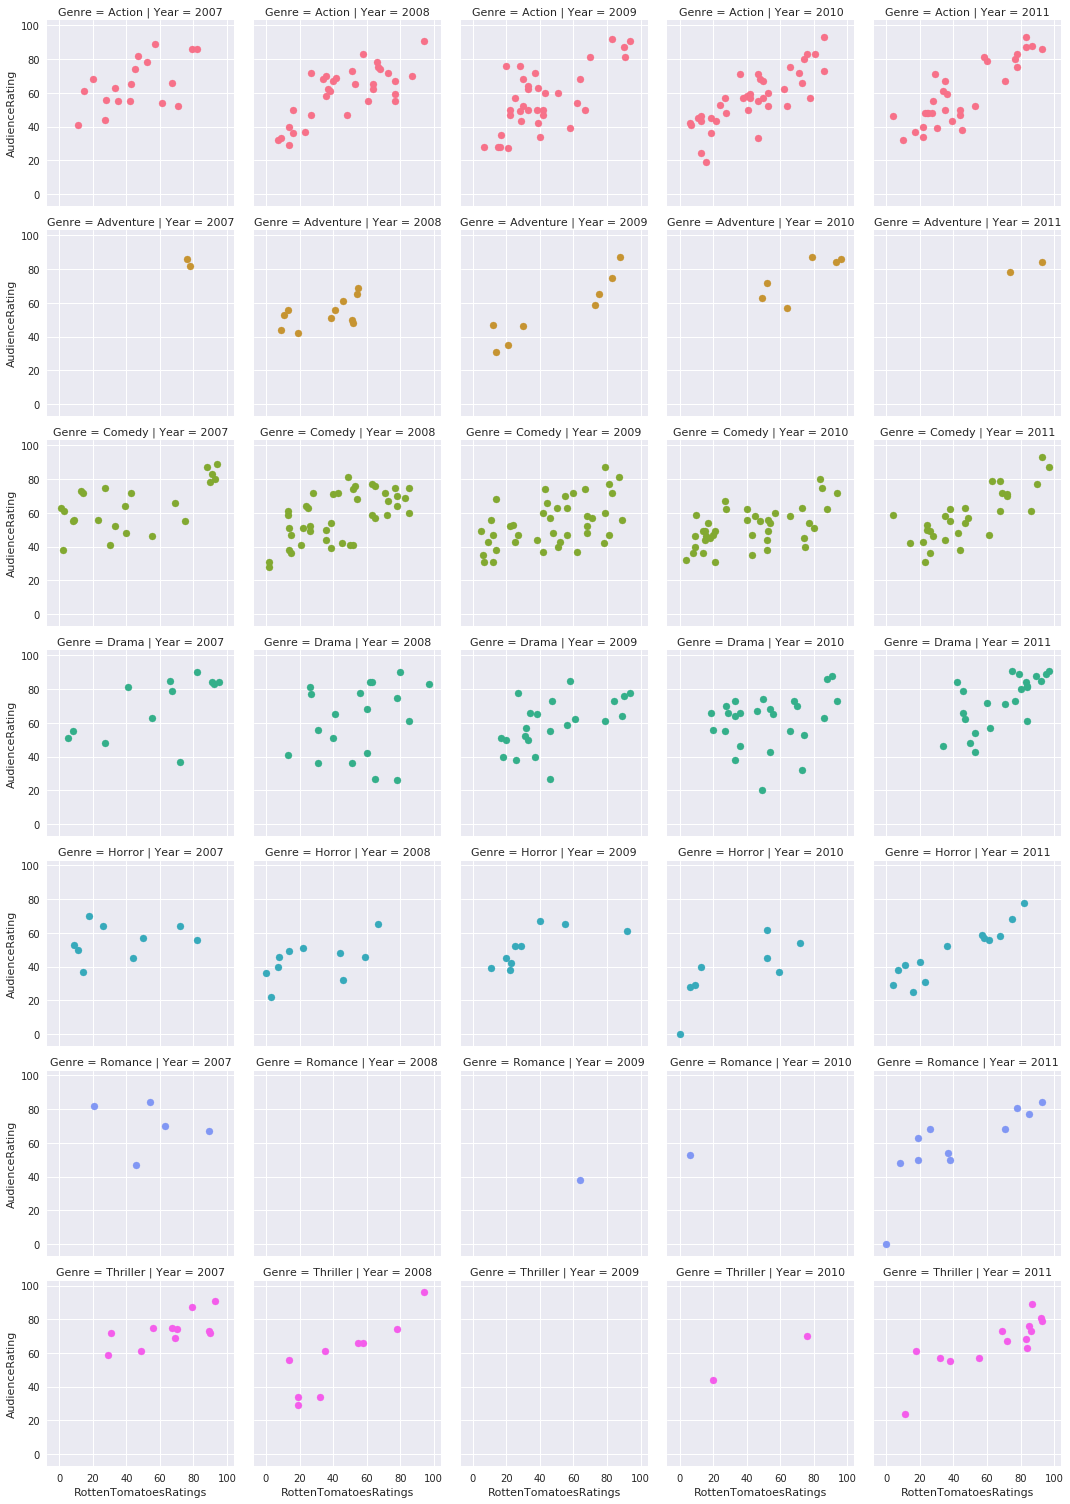

In [109]:
vis1 = sns.lmplot(data=movies, x='RottenTomatoesRatings', y='AudienceRating', hue='Genre', fit_reg=False)

g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'RottenTomatoesRatings', 'AudienceRating')

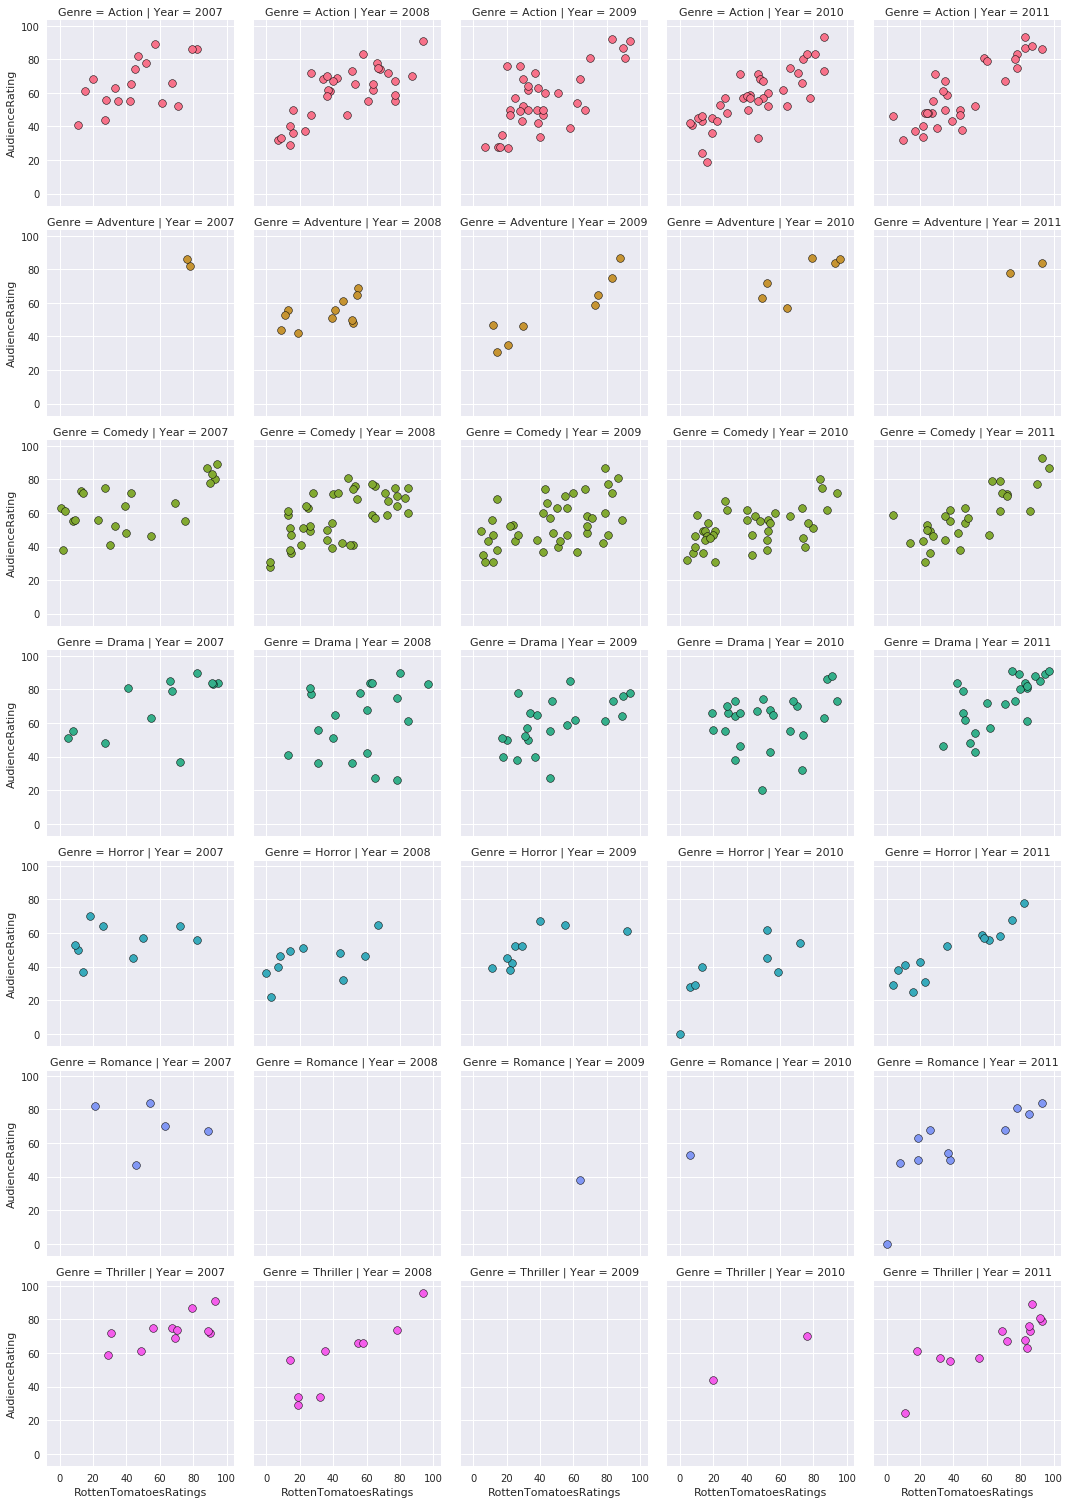

In [122]:
#Add additional argument to scatter plot facet
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=60, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'RottenTomatoesRatings', 'AudienceRating', **kws)

------

In [123]:
## Coordinates and Diagonals

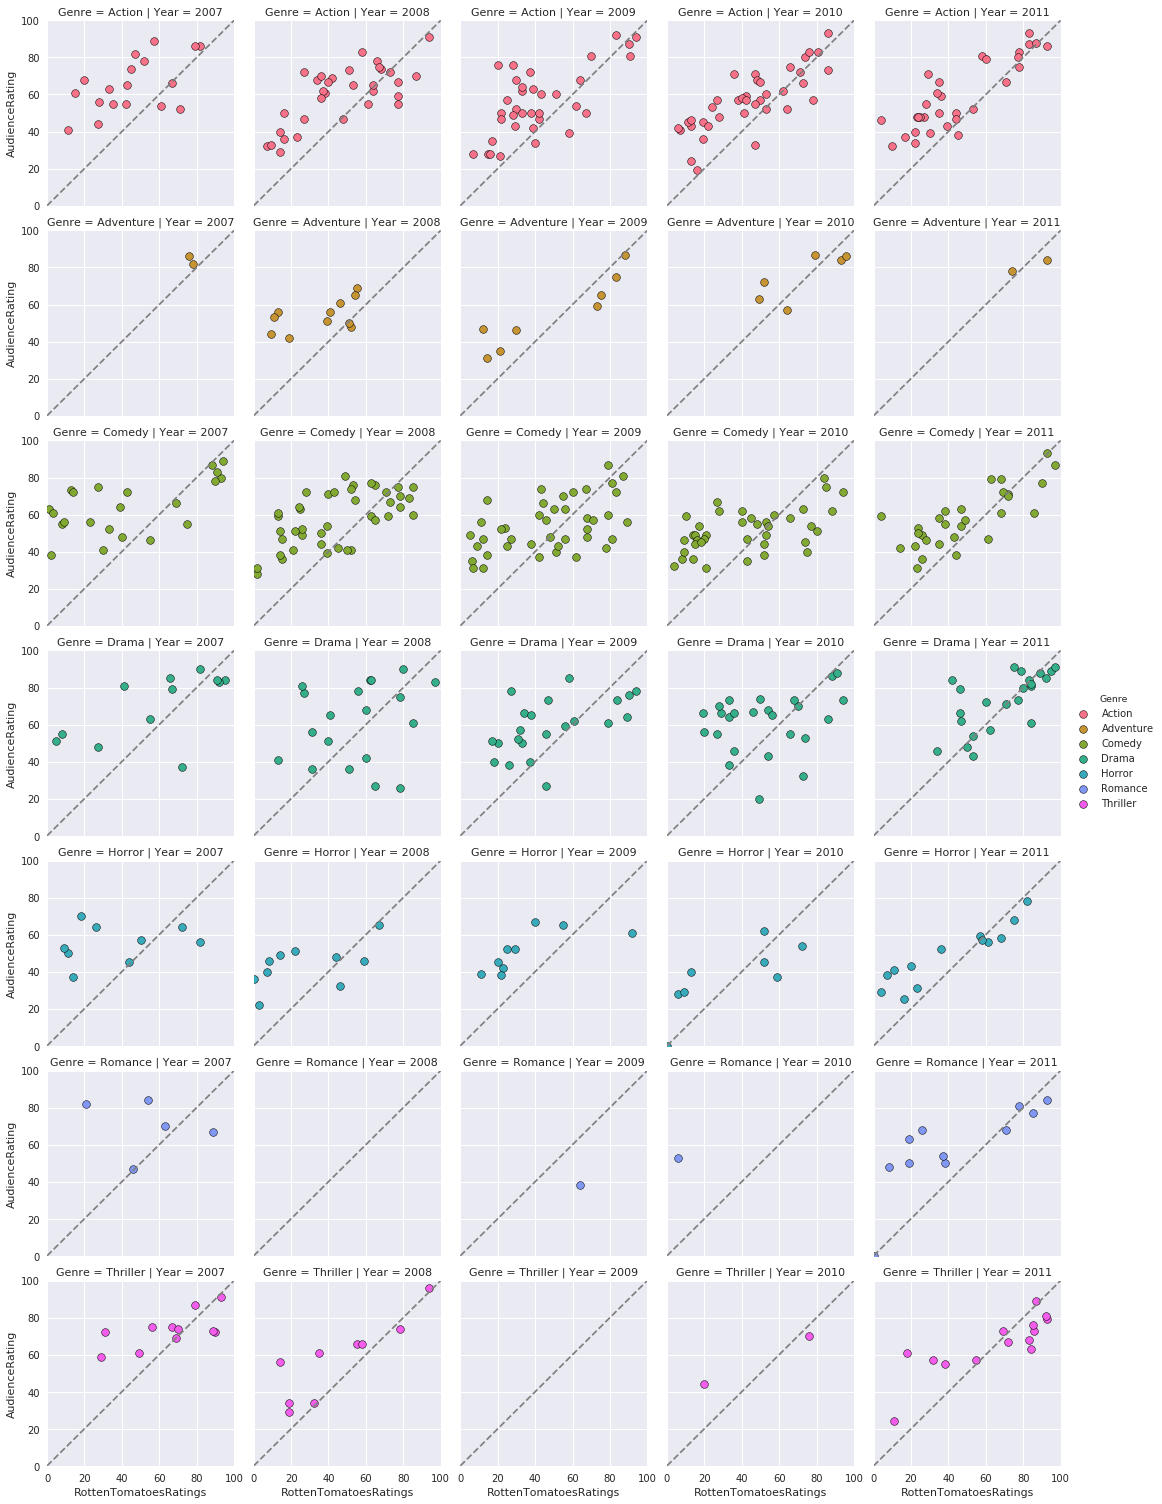

In [130]:
# Control axes and add diagonals
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=60, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'RottenTomatoesRatings', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))

for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='gray', ls='--')

g.add_legend()
plt.show()